In [1]:
pwd

'C:\\Users\\still\\OneDrive\\Diverse\\RUC\\MSc Thesis\\Jupyter'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random

In [3]:
################ SERVER ################

In [4]:
dataDir = '/Users/still/Downloads/Exported'

# Areas
nestServerEmployeesAreas = pd.read_csv(dataDir + '/nestServerEmployeesAreas.csv', sep=',', decimal= ',')
nestServerDepartmentsAreas = pd.read_csv(dataDir + '/nestServerDepartmentsAreas.csv', sep=',', decimal= ',')

my_pal = {"Express":"#ff9f0f"}#, "Nest":"#ff9f0f", "Fastify":"#03a341", "Koa":"#fa344f"}
my_pal2 = ["#ff9f0f"]#, "#ff9f0f", "#03a341", "#fa344f"]

nestServerDepartmentsAreas

,area,run
0,146.75000000000006,1
1,149.70000000000002,2
2,146.05000000000004,3
3,150.75000000000006,4
4,152.60000000000005,5
5,147.55000000000004,6
6,148.75000000000006,7
7,144.40000000000003,8
8,150.15000000000003,9
9,145.70000000000002,10


In [5]:
for i in range (0, 31):
    nestServerEmployeesAreas['area'][i] = round(float(nestServerEmployeesAreas['area'][i]),1)
    nestServerDepartmentsAreas['area'][i] = round(float(nestServerDepartmentsAreas['area'][i]),1)
    
nestServerEmployeesAreas

C:\Users\still\AppData\Local\Temp\ipykernel_35232\800143118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nestServerEmployeesAreas['area'][i] = round(float(nestServerEmployeesAreas['area'][i]),1)
C:\Users\still\AppData\Local\Temp\ipykernel_35232\800143118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nestServerDepartmentsAreas['area'][i] = round(float(nestServerDepartmentsAreas['area'][i]),1)


,area,run
0,83.1,1
1,89.4,2
2,86.8,3
3,80.8,4
4,75.8,5
5,80.3,6
6,85.3,7
7,80.3,8
8,76.1,9
9,76.5,10


In [6]:
m1c = nestServerEmployeesAreas['area'].mean()
m1s = nestServerDepartmentsAreas['area'].mean()

d = {'experiment': ["Nest"],
     'meanAreaEmp': [m1c],
     'meanAreaDept': [m1s]}
df = pd.DataFrame(data=d)

In [7]:
df2 = df
df2 = pd.melt(df2, id_vars="experiment", var_name="means", value_name="Mean area")
df2

,experiment,means,Mean area
0,Nest,meanAreaEmp,79.435484
1,Nest,meanAreaDept,147.848387


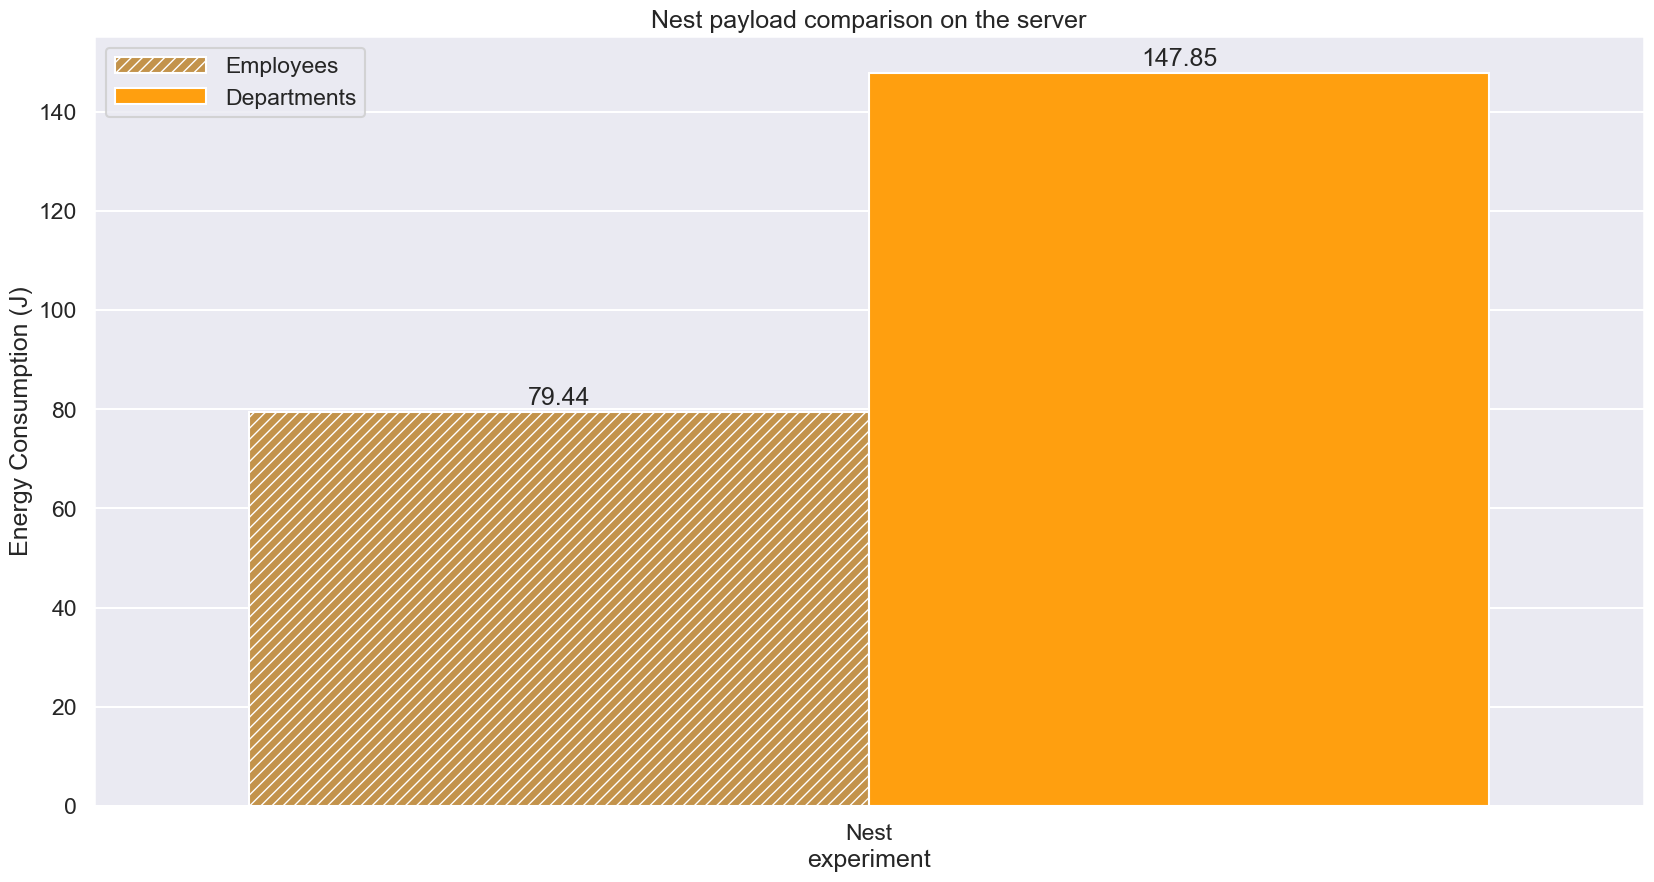

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk")
ax = sns.barplot(x="experiment", y="Mean area", hue="means",
            palette={'meanAreaEmp': 'white', 'meanAreaDept': 'black'}, data=df2)
for bar_group, desaturate_value in zip(ax.containers, [0.5, 1]):
    for bar, color in zip(bar_group, my_pal2):
        bar.set_facecolor(sns.desaturate(color, desaturate_value))

hatches = ["///", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
        
plt.title("Nest payload comparison on the server")
#plt.xlabel("Experiment Type")
plt.ylabel("Energy Consumption (J)")

handles, labels = ax.get_legend_handles_labels()

from matplotlib.legend_handler import HandlerTuple
ax.legend(handles=[tuple(bar_group) for bar_group in ax.containers],
          labels=['Employees', 'Departments'],
          handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)})

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

In [9]:
################ CLIENT ################

In [10]:
# Areas
nestClientEmployeesAreas = pd.read_csv(dataDir + '/nestClientEmployeesAreas.csv', sep=',', decimal= ',')
nestClientDepartmentsAreas = pd.read_csv(dataDir + '/nestClientDepartmentsAreas.csv', sep=',', decimal= ',')

nestClientEmployeesAreas

,area,run
0,81.05,1
1,86.15000000000002,2
2,83.25000000000001,3
3,78.39999999999999,4
4,73.6,5
5,77.25000000000001,6
6,81.95,7
7,77.69999999999999,8
8,72.24999999999999,9
9,74.85,10


In [11]:
for i in range (0, 31):
    nestClientEmployeesAreas['area'][i] = round(float(nestClientEmployeesAreas['area'][i]),1)
    nestClientDepartmentsAreas['area'][i] = round(float(nestClientDepartmentsAreas['area'][i]),1)
    
nestClientEmployeesAreas

C:\Users\still\AppData\Local\Temp\ipykernel_35232\2545671981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nestClientEmployeesAreas['area'][i] = round(float(nestClientEmployeesAreas['area'][i]),1)
C:\Users\still\AppData\Local\Temp\ipykernel_35232\2545671981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nestClientDepartmentsAreas['area'][i] = round(float(nestClientDepartmentsAreas['area'][i]),1)


,area,run
0,81.0,1
1,86.2,2
2,83.3,3
3,78.4,4
4,73.6,5
5,77.3,6
6,82.0,7
7,77.7,8
8,72.2,9
9,74.8,10


In [12]:
m1c = nestClientEmployeesAreas['area'].mean()
m1s = nestClientDepartmentsAreas['area'].mean()

d = {'experiment': ["Nest"],
     'meanAreaEmp': [m1c],
     'meanAreaDept': [m1s]}
df = pd.DataFrame(data=d)

In [13]:
df3 = df
df3 = pd.melt(df3, id_vars="experiment", var_name="means", value_name="Mean area")
df3

,experiment,means,Mean area
0,Nest,meanAreaEmp,76.835484
1,Nest,meanAreaDept,144.506452


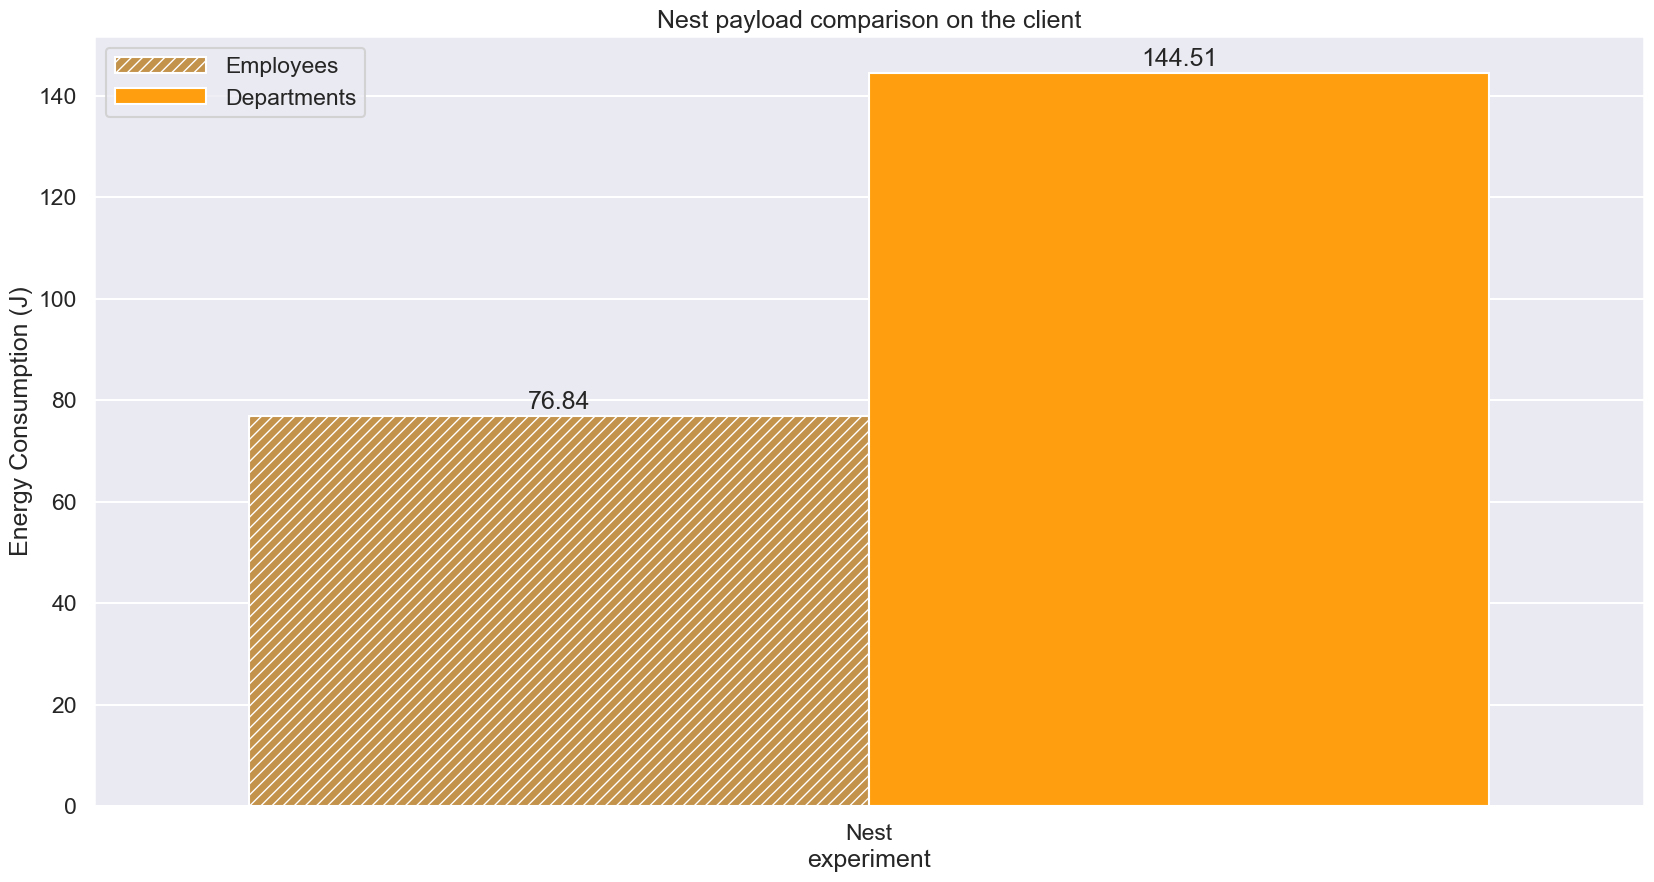

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk")
ax = sns.barplot(x="experiment", y="Mean area", hue="means",
            palette={'meanAreaEmp': 'white', 'meanAreaDept': 'black'}, data=df3)
for bar_group, desaturate_value in zip(ax.containers, [0.5, 1]):
    for bar, color in zip(bar_group, my_pal2):
        bar.set_facecolor(sns.desaturate(color, desaturate_value))

hatches = ["///", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
        
plt.title("Nest payload comparison on the client")
#plt.xlabel("Experiment Type")
plt.ylabel("Energy Consumption (J)")

handles, labels = ax.get_legend_handles_labels()

from matplotlib.legend_handler import HandlerTuple
ax.legend(handles=[tuple(bar_group) for bar_group in ax.containers],
          labels=['Employees', 'Departments'],
            handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)})

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()